# Pymaceuticals Inc.
---

### Analysis

- After reveiwing the data and performng the required calculations, the following observations are made:
1. Size/amount of tumor volume in a given sample of mice increase as the weight is increased per test.
2. Capomulin drug regimen has shown significant decrease in tumor volume over the given timepoints in one single mouse tewsted, and proves to be the case in other mice as well.
3. Few to none outliers are recorded in the data showing that data is consistent.
4. Capomulin and Ramicane were the drugs of choice of a larger sample than other drug regimens.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(len(combined_study_data['Mouse ID'].unique()))

249


In [3]:
#Duplicates found
duplicate_mice_data = combined_study_data[combined_study_data.duplicated(['Mouse ID', 'Timepoint'])]
print(duplicate_mice_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_data['Mouse ID']

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
combined_study_data['Mouse ID'] = combined_study_data['Mouse ID'].astype(str)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_study_data[combined_study_data['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined = combined_study_data.drop([combined_study_data.index[909], combined_study_data.index[911], 
                                      combined_study_data.index[913], combined_study_data.index[915],
                                      combined_study_data.index[917]])

In [8]:
cleaned_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
print(len(cleaned_combined['Mouse ID'].unique()))

249


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

cleaned_combined_2 = cleaned_combined.groupby('Drug Regimen')
cleaned_combined_2 = cleaned_combined.set_index('Drug Regimen')

drug_summary = pd.DataFrame()

drug_summary['Mean Tumor Volume'] = cleaned_combined_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_summary['Median Tumor Volume'] = cleaned_combined_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_summary['Tumor Volume Variance'] = cleaned_combined_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_summary['Tumor Volume Std. Dev.'] = cleaned_combined_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_summary['Tumor Volume Std. Err.'] = cleaned_combined_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

In [11]:
drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
Describe = cleaned_combined_2.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()
Describe

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


In [13]:
#DON'T TOUCH
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

## Bar and Pie Charts

In [14]:

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

In [15]:
count_by_drug = pd.DataFrame(cleaned_combined[['Drug Regimen', 'Timepoint']])
count_by_drug = count_by_drug.groupby('Drug Regimen').count()
count_by_drug = count_by_drug.sort_values(by=['Timepoint'], ascending=False)


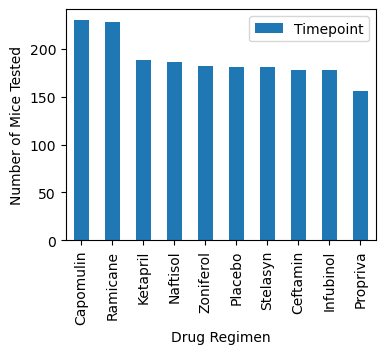

In [16]:
Drug_count = count_by_drug.plot(kind="bar", figsize=(4,3), ylabel='Number of Mice Tested', xlabel='Drug Regimen')

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


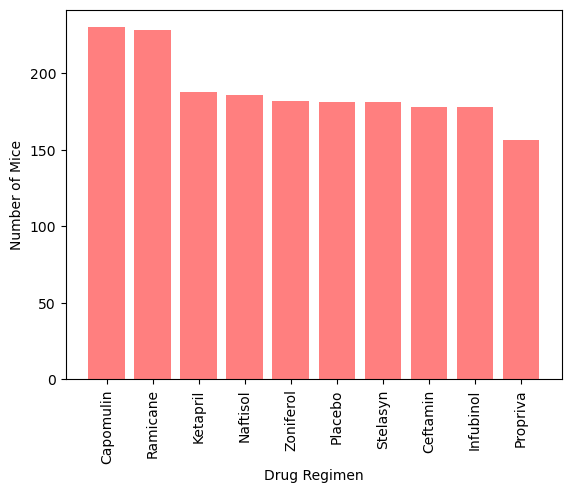

In [18]:
x_axis = np.arange(len(count_by_drug))
y_axis = count_by_drug['Timepoint']

plt.bar(x_axis, y_axis, color='r', alpha=0.50, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_by_drug.index, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [20]:
#pie plot using pandas
count_by_sex = pd.DataFrame(cleaned_combined[['Sex']]).value_counts()

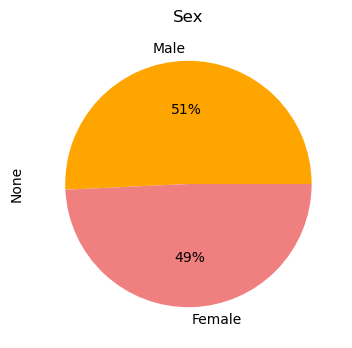

In [21]:
labels = ["Male", "Female"]
sizes = [count_by_sex]
colors = ["orange", "lightcoral"]
count_by_sex_plot = count_by_sex.plot(kind="pie", figsize=(5,4), title='Sex', autopct="%1.0f%%", labels = ["Male", "Female"], 
                                      colors = ["orange", "lightcoral"])

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

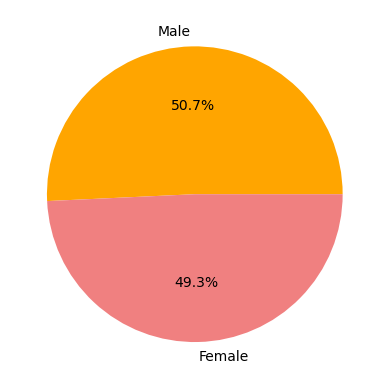

In [23]:
labels = ["Male", "Female"]
colors = ["orange", "lightcoral"]
plt.pie(count_by_sex, labels=labels, colors=colors, autopct="%1.1f%%",startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
#DON'T TOUCH
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [25]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = study_results.groupby(["Mouse ID"]).max()
max_timepoint

,Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,
a203,45,67.973419,2
a251,45,65.525743,1
a262,45,70.717621,4
a275,45,62.999356,3
a366,30,63.440686,1
...,...,...,...
z435,10,48.710661,0
z578,45,45.000000,0
z581,45,62.754451,3


In [26]:
#Merge the 2 dataframes
drug_max_timepoint = pd.merge(mouse_metadata, max_timepoint, on='Mouse ID')
drug_max_timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,45.000000,1
1,s185,Capomulin,Female,3,17,45,45.000000,1
2,x401,Capomulin,Female,16,15,45,45.473753,0
3,m601,Capomulin,Male,22,17,45,45.000000,1
4,g791,Ramicane,Male,11,16,45,45.851531,1
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,5,45.934712,0
245,z435,Propriva,Female,12,26,10,48.710661,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [27]:
#four_drugs_data = pd.DataFrame()
four_drugs_data = drug_max_timepoint[(drug_max_timepoint['Drug Regimen']=='Capomulin') | 
                              (drug_max_timepoint['Drug Regimen']=='Ramicane') | 
                              (drug_max_timepoint['Drug Regimen']=='Infubinol') |
                              (drug_max_timepoint['Drug Regimen']=='Ceftamin')]     
four_drugs_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,45.000000,1
1,s185,Capomulin,Female,3,17,45,45.000000,1
2,x401,Capomulin,Female,16,15,45,45.473753,0
3,m601,Capomulin,Male,22,17,45,45.000000,1
4,g791,Ramicane,Male,11,16,45,45.851531,1
...,...,...,...,...,...,...,...,...
235,x822,Ceftamin,Male,3,29,45,61.386660,3
237,y163,Infubinol,Female,17,27,45,67.685569,3
241,y769,Ceftamin,Female,6,27,45,68.594745,4
242,y865,Ceftamin,Male,23,26,45,64.729837,3


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
treatments = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']

In [29]:
Ramicane = four_drugs_data[four_drugs_data["Drug Regimen"]=="Ramicane"]
Ramicane_1 =  Ramicane["Tumor Volume (mm3)"]


In [30]:
Capomulin = four_drugs_data[four_drugs_data["Drug Regimen"]=="Capomulin"]
Capomulin_1 =  Capomulin["Tumor Volume (mm3)"]


In [31]:
Infubinol = four_drugs_data[four_drugs_data["Drug Regimen"]=="Infubinol"]
Infubinol_1 =  Infubinol["Tumor Volume (mm3)"]


In [32]:
Ceftamin = four_drugs_data[four_drugs_data["Drug Regimen"]=="Ceftamin"]
Ceftamin_1 =  Ceftamin["Tumor Volume (mm3)"]


In [33]:
new_drug_df = pd.DataFrame({"Ramicane_1": Ramicane_1, "Capomulin_1": Capomulin_1, 
                            "Infubinol_1": Infubinol_1, "Ceftamin_1": Ceftamin_1})

(40.0, 80.0)

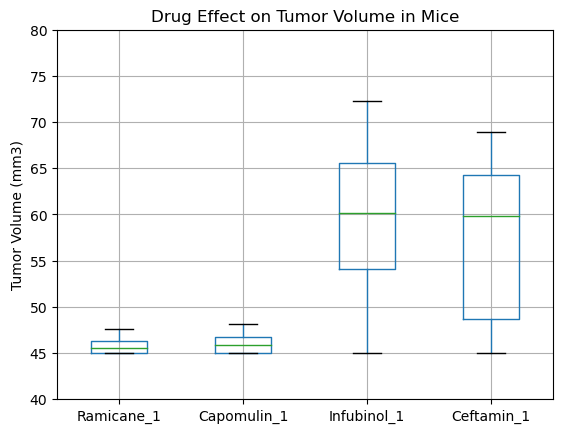

In [34]:
new_drug_df.boxplot()
plt.title('Drug Effect on Tumor Volume in Mice')
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(40, 80)

In [35]:
Tumor_volume = four_drugs_data['Tumor Volume (mm3)']

In [36]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartile = Tumor_volume.quantile([0.25, 0.5, 0.75])
lowerq = quartile[0.25]
upperq = quartile[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor_volume is: {lowerq}")
print(f"The upper quartile of Tumor_volume is: {upperq}")
print(f"The interquartile range of Tumor_volume is: {iqr}")
print(f"The the median of Tumor_volume is: {quartile[0.5]} ")

The lower quartile of Tumor_volume is: 45.5098442875
The upper quartile of Tumor_volume is: 59.930261755
The interquartile range of Tumor_volume is: 14.420417467499995
The the median of Tumor_volume is: 46.860058175 


In [37]:
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 23.87921808625001 could be outliers.
Values above 81.56088795624999 could be outliers.


In [38]:
for size in four_drugs_data['Tumor Volume (mm3)']:
    if size<lower_bound:
        print(f"lower outlier is {four_drugs_data['Mouse ID']}")
    if size>upper_bound:
        print(f"upper outlier is {four_drugs_data['Mouse ID']}")


In [39]:
#No outliers reported

## Line and Scatter Plots

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [56]:
single_mouse = study_results[study_results['Mouse ID']=='m601']


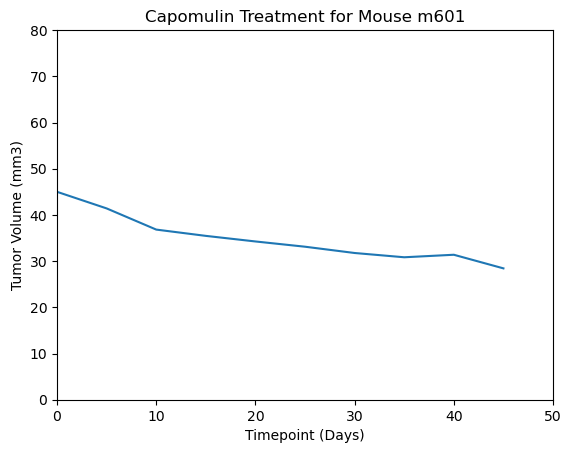

In [57]:
x_axis = single_mouse['Timepoint']
y_axis = single_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse m601")
plt.xlim(0, 50, 5)
plt.ylim(0, 80, 1)
plt.show()

In [43]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [44]:
Capomulin_only = cleaned_combined[cleaned_combined['Drug Regimen']=='Capomulin']


In [45]:
subset = Capomulin_only.sample(30)

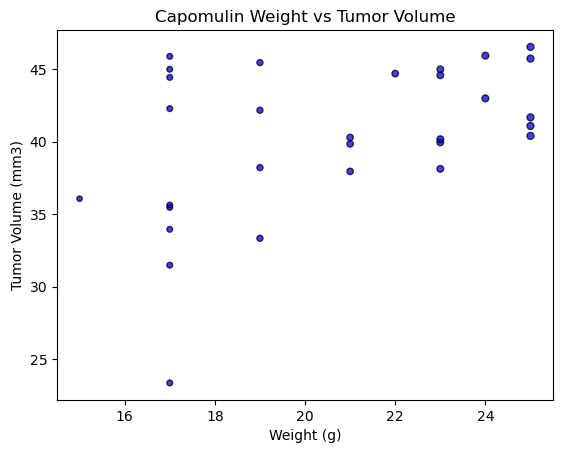

In [46]:
x_axis = subset['Weight (g)']
y_axis = subset['Tumor Volume (mm3)']

plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", s=x_axis, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Weight vs Tumor Volume")
plt.show()

## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [48]:
mouse_weight = subset['Weight (g)']
ave_tumor = subset['Tumor Volume (mm3)']

In [49]:
correlation = st.pearsonr(mouse_weight,ave_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.46


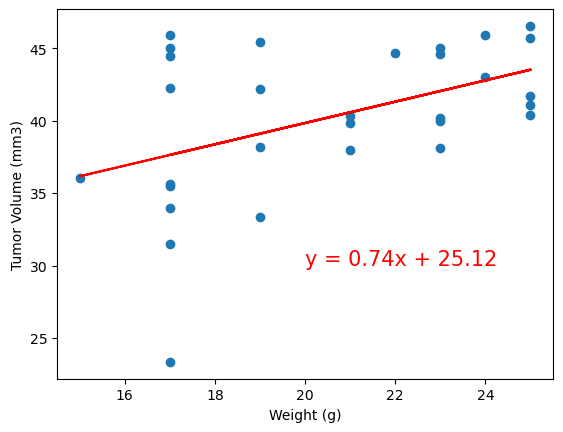

In [50]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, ave_tumor)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,ave_tumor)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()